In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import plotly.express as px
import seaborn as sns

In [ ]:
files = {'customers'    : '/content/drive/MyDrive/Datasets/olist_customers_dataset.csv',
         'geolocation'  : '/content/drive/MyDrive/Datasets/olist_geolocation_dataset.csv',
         'items'        : '/content/drive/MyDrive/Datasets/olist_order_items_dataset.csv',
         'payment'      : '/content/drive/MyDrive/Datasets/olist_order_payments_dataset.csv',
         'orders'       : '/content/drive/MyDrive/Datasets/olist_orders_dataset.csv',
         'products'     : '/content/drive/MyDrive/Datasets/olist_products_dataset.csv',
         'sellers'      : '/content/drive/MyDrive/Datasets/olist_sellers_dataset.csv',
         'review'       : '/content/drive/MyDrive/Datasets/olist_order_reviews_dataset.csv',
         }

dfs = {}
for key, value in files.items():
  dfs[key] = pd.read_csv(value, on_bad_lines='skip')

In [ ]:
customers_location = dfs['customers'].merge(dfs['geolocation'], how='inner', left_on='customer_zip_code_prefix', 
                                      right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')

In [ ]:
customers_location.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP
147,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.51,-47.40,franca,SP
294,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.51,-47.40,franca,SP
441,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.51,-47.40,franca,SP
588,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.51,-47.40,franca,SP


In [ ]:
customers_location.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,99163.00,99163.00,99163.00,99163.00
mean,35057.89,35057.89,-21.19,-46.18
std,29784.31,29784.31,5.62,4.07
min,1003.00,1003.00,-36.61,-72.67
25%,11320.00,11320.00,-23.59,-48.10
50%,24350.00,24350.00,-22.93,-46.63
75%,58406.50,58406.50,-20.15,-43.60
max,99990.00,99990.00,42.18,-8.58


In [ ]:
print('ISNA')
print(customers_location.isna().sum())
print('\nISNULL')
print(customers_location.isnull().sum())

ISNA
customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

ISNULL
customer_id                    0
customer_unique_id             0
customer_zip_code_prefix       0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [ ]:
customers_location.to_csv('customers_location.csv')

In [ ]:
cusloc_order = customers_location.merge(dfs['orders'], how='inner', on='customer_id')

In [ ]:
cusloc_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.51,-47.40,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.51,-47.40,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.51,-47.40,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.51,-47.40,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00


In [ ]:
cusloc_order.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,99163.00,99163.00,99163.00,99163.00
mean,35057.89,35057.89,-21.19,-46.18
std,29784.31,29784.31,5.62,4.07
min,1003.00,1003.00,-36.61,-72.67
25%,11320.00,11320.00,-23.59,-48.10
50%,24350.00,24350.00,-22.93,-46.63
75%,58406.50,58406.50,-20.15,-43.60
max,99990.00,99990.00,42.18,-8.58


In [ ]:
print('ISNA')
print(cusloc_order.isna().sum())
print('\nISNULL')
print(cusloc_order.isnull().sum())

ISNA
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 159
order_delivered_carrier_date     1776
order_delivered_customer_date    2951
order_estimated_delivery_date       0
dtype: int64

ISNULL
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city        

In [ ]:
cusloc_order.to_csv('cusloc_order.csv')

In [ ]:
cuslocord_item = cusloc_order.merge(dfs['items'], how='inner', on='order_id')

In [ ]:
cuslocord_item.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11


In [ ]:
cuslocord_item.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value
count,112348.00,112348.00,112348.00,112348.00,112348.00,112348.00,112348.00
mean,35042.48,35042.48,-21.24,-46.20,1.20,120.64,19.98
std,29853.32,29853.32,5.58,4.05,0.71,183.67,15.81
min,1003.00,1003.00,-36.61,-72.67,1.00,0.85,0.00
25%,11250.00,11250.00,-23.59,-48.11,1.00,39.90,13.07
50%,24240.00,24240.00,-22.93,-46.63,1.00,74.99,16.26
75%,58430.25,58430.25,-20.19,-43.64,1.00,134.90,21.15
max,99990.00,99990.00,42.18,-8.58,21.00,6735.00,409.68


In [ ]:
print('ISNA')
print(cuslocord_item.isna().sum())
print('\nISNULL')
print(cuslocord_item.isnull().sum())

ISNA
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1187
order_delivered_customer_date    2440
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

ISNULL
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix

In [ ]:
cuslocord_item.to_csv('cuslocord_item.csv')

In [ ]:
cuslocordite_prod = cuslocord_item.merge(dfs['products'], how='inner', on='product_id')

In [ ]:
cuslocordite_prod.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,124.99,21.88,moveis_escritorio,41.00,1141.00,1.00,8683.00,54.00,64.00,31.00
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.15,-45.00,barreiras,BA,...,126.99,43.26,moveis_escritorio,41.00,1141.00,1.00,8683.00,54.00,64.00,31.00
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.15,-45.00,barreiras,BA,...,126.99,43.26,moveis_escritorio,41.00,1141.00,1.00,8683.00,54.00,64.00,31.00
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,6414,-23.50,-46.87,barueri,SP,...,112.99,18.51,moveis_escritorio,41.00,1141.00,1.00,8683.00,54.00,64.00,31.00
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,37137,-21.41,-45.94,alfenas,MG,...,116.99,57.08,moveis_escritorio,41.00,1141.00,1.00,8683.00,54.00,64.00,31.00


In [ ]:
cuslocordite_prod.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112348.00,112348.00,112348.00,112348.00,112348.00,112348.00,112348.00,110751.00,110751.00,110751.00,112330.00,112330.00,112330.00,112330.00
mean,35042.48,35042.48,-21.24,-46.20,1.20,120.64,19.98,48.78,787.95,2.21,2094.50,30.16,16.60,23.00
std,29853.32,29853.32,5.58,4.05,0.71,183.67,15.81,10.03,652.27,1.72,3752.87,16.15,13.45,11.71
min,1003.00,1003.00,-36.61,-72.67,1.00,0.85,0.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00
25%,11250.00,11250.00,-23.59,-48.11,1.00,39.90,13.07,42.00,348.00,1.00,300.00,18.00,8.00,15.00
50%,24240.00,24240.00,-22.93,-46.63,1.00,74.99,16.26,52.00,602.00,1.00,700.00,25.00,13.00,20.00
75%,58430.25,58430.25,-20.19,-43.64,1.00,134.90,21.15,57.00,987.00,3.00,1800.00,38.00,20.00,30.00
max,99990.00,99990.00,42.18,-8.58,21.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


In [ ]:
print('ISNA')
print(cuslocordite_prod.isna().sum())
print('\nISNULL')
print(cuslocordite_prod.isnull().sum())

ISNA
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix         0
geolocation_lat                     0
geolocation_lng                     0
geolocation_city                    0
geolocation_state                   0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1187
order_delivered_customer_date    2440
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1597
product_name_lenght              1597
product_description_lenght       1597
product

In [ ]:
cuslocordite_prod.to_csv('cuslocordite_prod.csv')

In [ ]:
cuslocordite_rev= cuslocordite_prod.merge(dfs['review'], how='left', on='order_id')

In [ ]:
cuslocordite_rev.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.51,-47.40,franca,SP,...,8683.00,54.00,64.00,31.00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.15,-45.00,barreiras,BA,...,8683.00,54.00,64.00,31.00,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.15,-45.00,barreiras,BA,...,8683.00,54.00,64.00,31.00,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,6414,-23.50,-46.87,barueri,SP,...,8683.00,54.00,64.00,31.00,e934b832e3bd9951f2a163ea80cfe20d,4,NaN,NaN,2017-12-19 00:00:00,2017-12-21 21:48:38
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,37137,-21.41,-45.94,alfenas,MG,...,8683.00,54.00,64.00,31.00,b89b4460c0b589c0614d9b0126ae755a,3,NaN,Produto bom em conforme com o preço,2018-04-03 00:00:00,2018-04-03 23:42:32


In [ ]:
cuslocordite_rev.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,113015.00,113015.00,113015.00,113015.00,113015.00,113015.00,113015.00,111409.00,111409.00,111409.00,112997.00,112997.00,112997.00,112997.00,113015.00
mean,35045.19,35045.19,-21.24,-46.20,1.20,120.47,19.97,48.78,786.96,2.21,2092.86,30.17,16.59,23.01,4.02
std,29857.14,29857.14,5.58,4.05,0.71,183.32,15.79,10.03,651.90,1.72,3751.11,16.15,13.44,11.71,1.40
min,1003.00,1003.00,-36.61,-72.67,1.00,0.85,0.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,1.00
25%,11095.00,11095.00,-23.59,-48.11,1.00,39.90,13.07,42.00,348.00,1.00,300.00,18.00,8.00,15.00,4.00
50%,24240.00,24240.00,-22.93,-46.63,1.00,74.90,16.25,52.00,601.00,1.00,700.00,25.00,13.00,20.00,5.00
75%,58432.50,58432.50,-20.19,-43.64,1.00,134.90,21.15,57.00,985.00,3.00,1800.00,38.00,20.00,30.00,5.00
max,99990.00,99990.00,42.18,-8.58,21.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,5.00


In [ ]:
print('ISNA')
print(cuslocordite_rev.isna().sum())
print('\nISNULL')
print(cuslocordite_rev.isnull().sum())

ISNA
customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
geolocation_zip_code_prefix          0
geolocation_lat                      0
geolocation_lng                      0
geolocation_city                     0
geolocation_state                    0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1196
order_delivered_customer_date     2461
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1606
product_name_lenght               1606
product_description_

In [ ]:
cuslocordite_rev.to_csv('cuslocordite_rev.csv')

In [ ]:
dataset = cuslocordite_rev[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng','order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp']]

In [ ]:
dates = ['order_purchase_timestamp'
        ,'order_purchase_timestamp'
        ,'order_delivered_carrier_date'
        ,'order_delivered_customer_date'
        ,'order_estimated_delivery_date'
        ,'shipping_limit_date'
        ,'review_creation_date'
        ,'review_answer_timestamp' 
        ]

In [ ]:
for date in dates:
    dataset[date] = pd.to_datetime(dataset[date])

In [ ]:
dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_photos_qty,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.51,-47.40,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,124.99,21.88,moveis_escritorio,1.00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.15,-45.00,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,126.99,43.26,moveis_escritorio,1.00,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15,2018-03-15 18:15:00
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.15,-45.00,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,126.99,43.26,moveis_escritorio,1.00,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15,2018-03-15 18:15:00
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.50,-46.87,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,112.99,18.51,moveis_escritorio,1.00,e934b832e3bd9951f2a163ea80cfe20d,4,NaN,NaN,2017-12-19,2017-12-21 21:48:38
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.41,-45.94,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,116.99,57.08,moveis_escritorio,1.00,b89b4460c0b589c0614d9b0126ae755a,3,NaN,Produto bom em conforme com o preço,2018-04-03,2018-04-03 23:42:32
5,cf4dc8d4be7642c7c05a73188a3d8c1c,35c0fa6f2e6bbb3576e725d22e1066b8,23585,rio de janeiro,RJ,-22.93,-43.64,edc9338008f2e9017f842a8bcad3af94,delivered,2017-04-28 16:55:22,...,124.99,15.04,moveis_escritorio,1.00,51269da957ddb113f61d7ca81418e1f5,5,NaN,NaN,2017-05-17,2017-05-18 23:01:24
6,ab156e9202420e577b405360a7b29cbc,b52b8debdefe66d4c0d7f44d9b4ff088,28950,armacao dos buzios,RJ,-22.77,-41.90,54d6f9d8f56229d3da815add65ec2408,delivered,2018-03-22 10:58:13,...,116.99,57.08,moveis_escritorio,1.00,ba99c73cdfb4cac0b65aecc0d94787bb,1,Negativa,Não recebi o produto e nem satisfação,2018-05-02,2018-05-09 18:56:15
7,ab156e9202420e577b405360a7b29cbc,b52b8debdefe66d4c0d7f44d9b4ff088,28950,armacao dos buzios,RJ,-22.77,-41.90,54d6f9d8f56229d3da815add65ec2408,delivered,2018-03-22 10:58:13,...,116.99,57.08,moveis_escritorio,1.00,ba99c73cdfb4cac0b65aecc0d94787bb,1,Negativa,Não recebi o produto e nem satisfação,2018-05-02,2018-05-09 18:56:15
8,11eee0e62a0b905cf878ff13c8aec4a0,7dd466ce70871be5aba0ea1a43df6021,40230,salvador,BA,-12.99,-38.51,ff7400d904161b62b6e830b3988f5cbd,delivered,2018-03-27 15:37:03,...,116.99,37.97,moveis_escritorio,1.00,e9ccfd7b04e62cf0a6ac4a66b9783886,2,NaN,NaN,2018-04-26,2018-04-27 11:10:05
9,645d4fd3f4546d7c9592576665711186,661ada8f1f0f348790c6b9ce57d51f55,17521,marilia,SP,-22.24,-49.92,6b5c76c2c9615b42e0c2b7efb11b60d7,delivered,2018-04-03 21:24:29,...,116.99,23.54,moveis_escritorio,1.00,fbb7c08e8ca00f3412c095449c59d83b,3,NaN,"o produto chegou certinho, porém não veio os p...",2018-04-25,2018-04-25 18:17:53


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113015 entries, 0 to 113014
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113015 non-null  object        
 1   customer_unique_id             113015 non-null  object        
 2   customer_zip_code_prefix       113015 non-null  int64         
 3   customer_city                  113015 non-null  object        
 4   customer_state                 113015 non-null  object        
 5   geolocation_lat                113015 non-null  float64       
 6   geolocation_lng                113015 non-null  float64       
 7   order_id                       113015 non-null  object        
 8   order_status                   113015 non-null  object        
 9   order_purchase_timestamp       113015 non-null  datetime64[ns]
 10  order_approved_at              113000 non-null  object        
 11  

In [ ]:
dataset['delivery_time'] = (dataset['order_delivered_customer_date'].dt.date - dataset['order_purchase_timestamp'].dt.date).dt.days

In [ ]:
dataset = dataset[(dataset['order_purchase_timestamp'].dt.year > 2016) 
              & 
              (dataset['order_purchase_timestamp'] < pd.to_datetime('20180901'))
             ]

In [ ]:
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.describe()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,product_photos_qty,review_score,delivery_time
count,112639.00,112639.00,112639.00,112639.00,112639.00,112639.00,111035.00,112639.00,110226.00
mean,35029.41,-21.24,-46.20,1.20,120.42,19.97,2.21,4.02,12.39
std,29852.77,5.58,4.04,0.71,183.33,15.79,1.72,1.40,9.43
min,1003.00,-36.61,-72.67,1.00,0.85,0.00,1.00,1.00,0.00
25%,11086.00,-23.59,-48.11,1.00,39.90,13.07,1.00,4.00,7.00
50%,24240.00,-22.93,-46.63,1.00,74.90,16.25,1.00,5.00,10.00
75%,58416.00,-20.19,-43.64,1.00,134.90,21.15,3.00,5.00,15.00
max,99990.00,42.18,-8.58,21.00,6735.00,409.68,20.00,5.00,210.00


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112639 entries, 0 to 112638
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112639 non-null  object        
 1   customer_unique_id             112639 non-null  object        
 2   customer_zip_code_prefix       112639 non-null  int64         
 3   customer_city                  112639 non-null  object        
 4   customer_state                 112639 non-null  object        
 5   geolocation_lat                112639 non-null  float64       
 6   geolocation_lng                112639 non-null  float64       
 7   order_id                       112639 non-null  object        
 8   order_status                   112639 non-null  object        
 9   order_purchase_timestamp       112639 non-null  datetime64[ns]
 10  order_approved_at              112624 non-null  object        
 11  

In [ ]:
print('ISNA')
print(dataset.isna().sum())
print('\nISNULL')
print(dataset.isnull().sum())

ISNA
customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
geolocation_lat                      0
geolocation_lng                      0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1159
order_delivered_customer_date     2413
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1604
product_photos_qty                1604
review_id                            0
review_score                         0
review_comment_title             99062
review_comment_messa

In [ ]:
price_plot = px.box(dataset['price'], y='price')
price_plot.show()

In [ ]:
freight_value_plot = px.box(dataset['freight_value'], y='freight_value')
freight_value_plot.show()

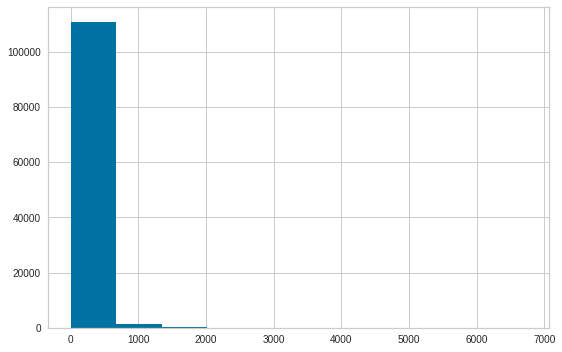

In [ ]:
plt.hist(x = dataset['price']);

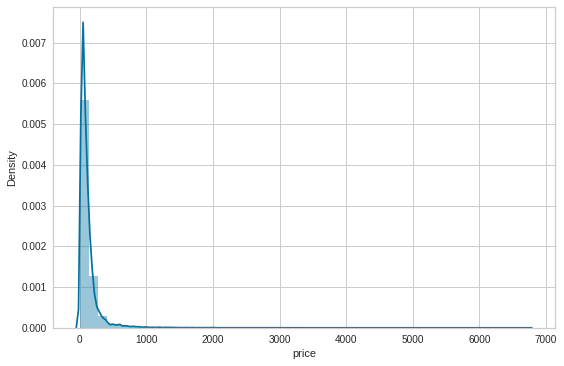

In [ ]:
sns.distplot(dataset['price'], hist = True, kde = True);

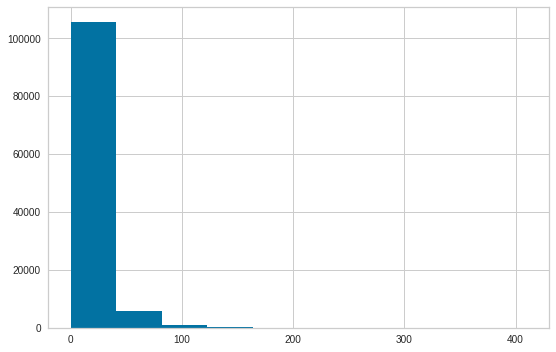

In [ ]:
plt.hist(x = dataset['freight_value']);

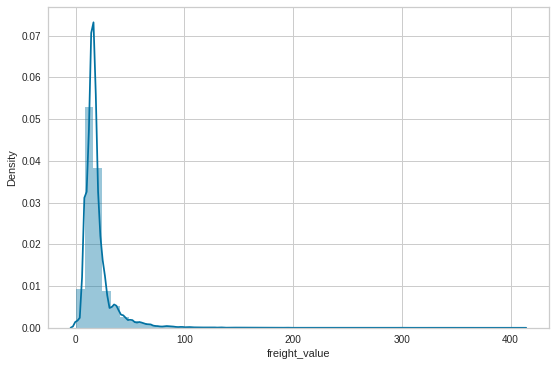

In [ ]:
sns.distplot(dataset['freight_value'], hist = True, kde = True);

In [ ]:
dataset.to_csv('ecommerce_analytics.csv')

In [ ]:
months_portchases = pd.DataFrame()

In [ ]:
months_portchases['month'] = dataset['order_purchase_timestamp'].dt.month

In [ ]:
months_portchases['year'] = dataset['order_purchase_timestamp'].dt.year

In [ ]:
months_portchases['count'] = dataset['customer_id']

In [ ]:
months_portchases = months_portchases.groupby(['year','month'])['count'].count().reset_index()

In [ ]:
months_portchases['year_month'] = months_portchases['year'].astype(str) + ', ' + months_portchases['month'].astype(str)

In [ ]:
months_portchases.head()

,year,month,count,year_month
0,2017,1,966,"2017, 1"
1,2017,2,1961,"2017, 2"
2,2017,3,3013,"2017, 3"
3,2017,4,2687,"2017, 4"
4,2017,5,4170,"2017, 5"


In [ ]:
months_portchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        24 non-null     int64 
 1   month       24 non-null     int64 
 2   count       24 non-null     int64 
 3   year_month  24 non-null     object
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [ ]:
months_portchases.describe()

,year,month,count
count,20.00,20.00,20.00
mean,2017.40,5.70,5631.95
std,0.50,3.28,2348.45
min,2017.00,1.00,966.00
25%,2017.00,3.00,4027.75
50%,2017.00,5.50,5837.50
75%,2018.00,8.00,7791.25
max,2018.00,12.00,8702.00


In [ ]:
print('ISNA')
print(months_portchases.isna().sum())
print('\nISNULL')
print(months_portchases.isnull().sum())

ISNA
year          0
month         0
count         0
year_month    0
dtype: int64

ISNULL
year          0
month         0
count         0
year_month    0
dtype: int64


In [ ]:
months_portchases.to_csv('months_portchases.csv')

Gráfico I


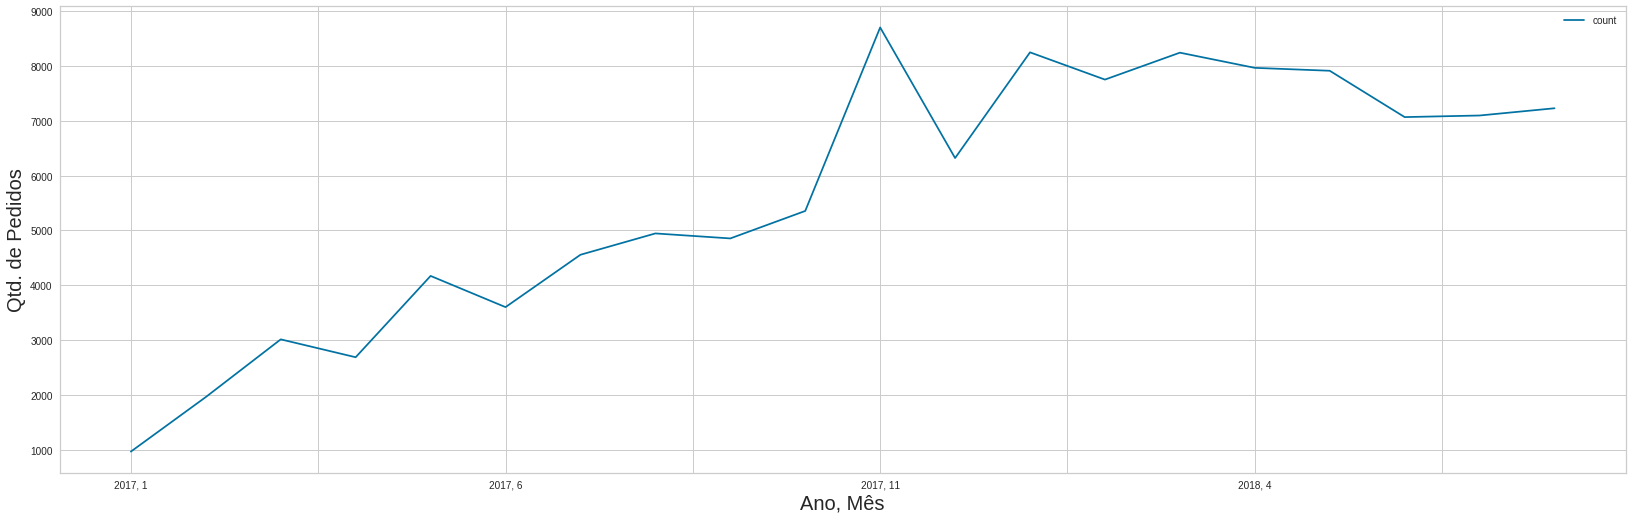

In [ ]:
months_portchases.plot(x='year_month', y='count', figsize=(25,8))#, color='#42A5F5', alpha=0.9, ci=None)
plt.xlabel('Ano, Mês', size=20)
plt.ylabel('Qtd. de Pedidos', size=20)

print(r'Gráfico I')
plt.show()

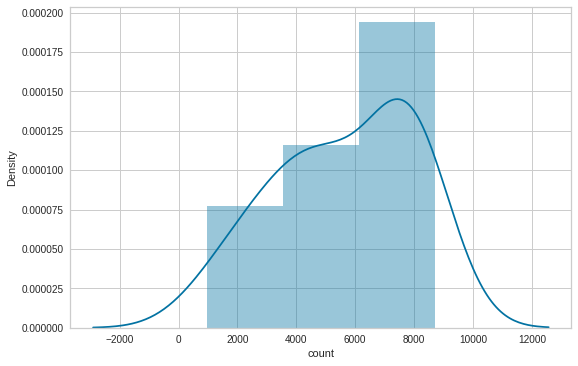

In [ ]:
sns.distplot(months_portchases['count'], hist = True, kde = True);

In [ ]:
state_portchases = dataset.groupby('customer_state', as_index=False)['price'].sum().sort_values(by='customer_state')
state_portchases_avg = dataset.groupby('customer_state', as_index=False)['price'].mean().sort_values(by='customer_state')
freight_avg = dataset.groupby('customer_state', as_index=False)['freight_value'].mean().sort_values(by='customer_state')

Gráfico II


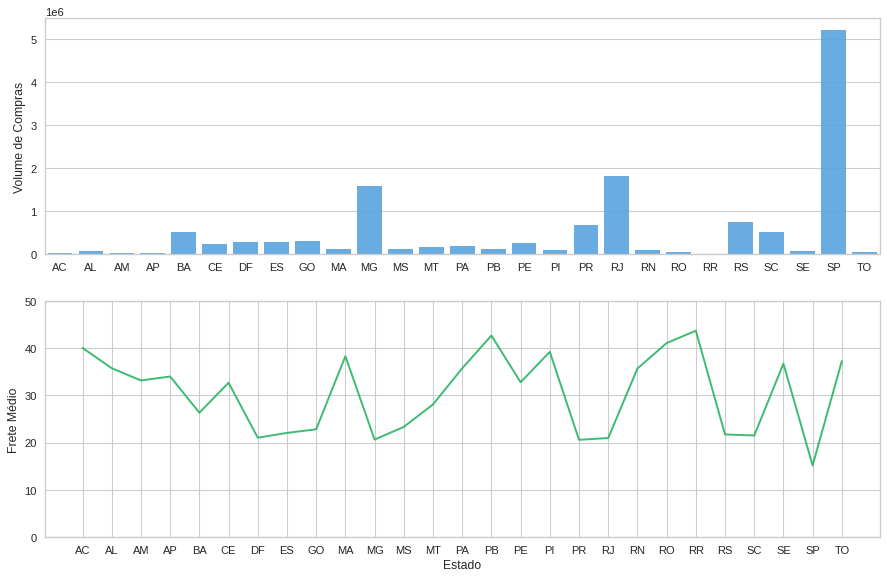

In [ ]:
figure(num=None, figsize=(12, 8), dpi=80)

plt.subplot(2, 1, 1)
sns.barplot(x=state_portchases['customer_state'], y=state_portchases['price'], color='#42A5F5', alpha=0.9)
plt.xlabel(None)
plt.ylabel('Volume de Compras')

plt.subplot(2, 1, 2)
sns.lineplot(x=freight_avg['customer_state'], y=freight_avg['freight_value'], color='#28B463', alpha=0.9)
#ylim(top=3)  # adjust the top leaving bottom unchanged
plt.ylim(0,50)
plt.xlabel('Estado')
plt.ylabel('Frete Médio')

print(r'Gráfico II')
plt.show()

Gráfico III


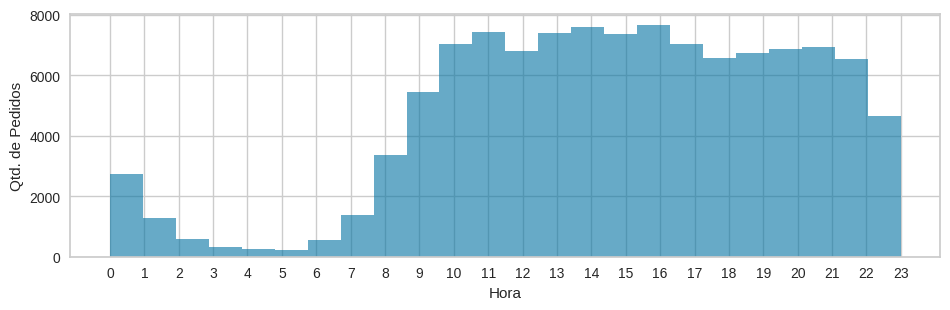

In [ ]:
dataset['purchase_hour'] = dataset['order_purchase_timestamp'].dt.hour

figure(num=None, figsize=(10, 3), dpi=100)
plt.hist(dataset['purchase_hour'], bins=24, facecolor='b', alpha=0.6)
plt.xticks(ticks=np.arange(24))
plt.xlabel('Hora')
plt.ylabel('Qtd. de Pedidos')

print(r'Gráfico III')
plt.show()

In [ ]:
cus_value = dataset.groupby('customer_unique_id', as_index=False)['price'].sum() #price_x
cus_qtd = dataset.groupby('customer_unique_id', as_index=False)['price'].count() #price_y
cus_freight = dataset.groupby('customer_unique_id', as_index=False)['freight_value'].sum()
cus_loc = dataset[['customer_unique_id', 'geolocation_lat', 'geolocation_lng', 'customer_state']].drop_duplicates('customer_unique_id')
cus_review = dataset.groupby('customer_unique_id', as_index=False)['review_score'].mean()

#União das informações em um Dataframe
customer = cus_value.merge(cus_qtd, on='customer_unique_id')
customer = customer.merge(cus_freight, on='customer_unique_id')
customer = customer.merge(cus_loc, on='customer_unique_id')
customer = customer.merge(cus_review, on='customer_unique_id')
customer = customer.rename(columns={'price_x':'price', 'price_y':'count_items'})

print('Média do valor de compra: R$ ' + str(round(customer['price'].mean(),2)) + '\nDesvio Padrão: R$ ' + str(round(customer['price'].std(),2)))
customer.sort_values(by='price', ascending=False).head(10)

Média do valor de compra: R$ 143.0
Desvio Padrão: R$ 218.97


,customer_unique_id,price,count_items,freight_value,geolocation_lat,geolocation_lng,customer_state,review_score
3772,0a0a92112bd4c708ca5fde585afaa872,13440.00,8,224.08,-22.90,-43.18,RJ,1.00
80906,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2,183.63,-22.87,-42.27,RJ,5.00
43891,763c8b1c9c68a0229c42c9fc6f662b93,7160.00,4,114.88,-20.38,-40.31,ES,1.00
81746,dc4802a71eae9be1dd28f5d788ceb526,6735.00,1,194.31,-20.50,-54.57,MS,5.00
25865,459bef486812aa25204be022145caa62,6729.00,1,193.21,-20.27,-40.28,ES,1.00
94572,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,1,227.66,-22.21,-49.95,SP,5.00
23805,4007669dec559734d6f53e029e360987,5934.60,6,146.94,-20.16,-44.88,MG,1.00
88532,eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,1,74.34,-23.68,-46.42,SP,4.00
34622,5d0a2980b292d049061542014e8960bf,4599.90,2,209.54,-16.69,-49.28,GO,1.00
27084,48e1ac109decbb87765a3eade6854098,4590.00,1,91.78,-7.10,-34.84,PB,5.00
